In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [9]:
df= pd.read_csv('dummy_data.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df = df[['Survived','Age','Fare']]

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
df.corr()['Age']

Survived   -0.077221
Age         1.000000
Fare        0.096067
Name: Age, dtype: float64

In [34]:
from sklearn.impute import KNNImputer

In [46]:
knn=KNNImputer(n_neighbors=7)
knn_df = pd.DataFrame(knn.fit_transform(df[['Age']]),columns=['Age_N'])

In [58]:
df_n = pd.concat([df.drop(columns=['Age']),knn_df],axis=1).rename(columns={'Age_N':'Age'})

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\3129978658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=ax1)
C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\3129978658.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n['Age'],ax=ax2)


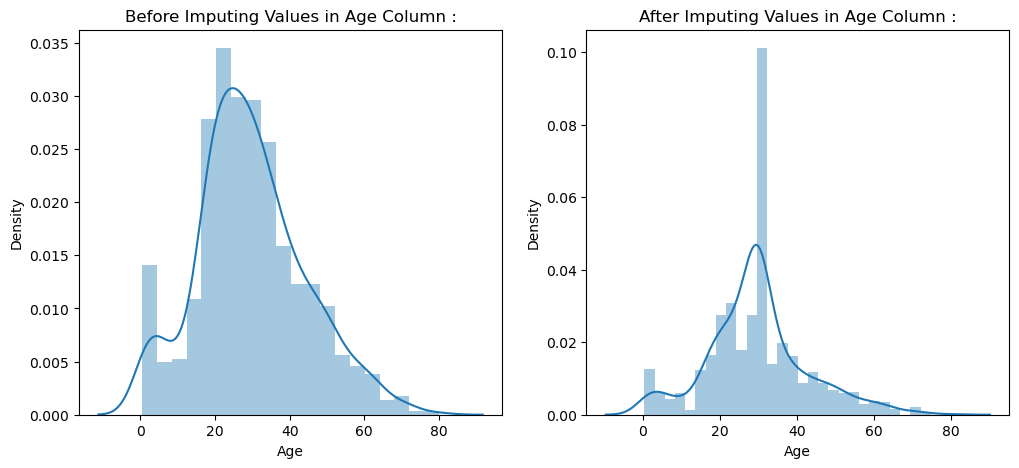

In [72]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Imputing Values in Age Column :')

sns.distplot(df['Age'],ax=ax1)

ax2.set_title('After Imputing Values in Age Column :')

sns.distplot(df_n['Age'],ax=ax2)

plt.show()

In [83]:
df_n.head()

,Survived,Fare,Age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0


In [85]:
import scipy.stats as stats

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\1888761186.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=ax1)


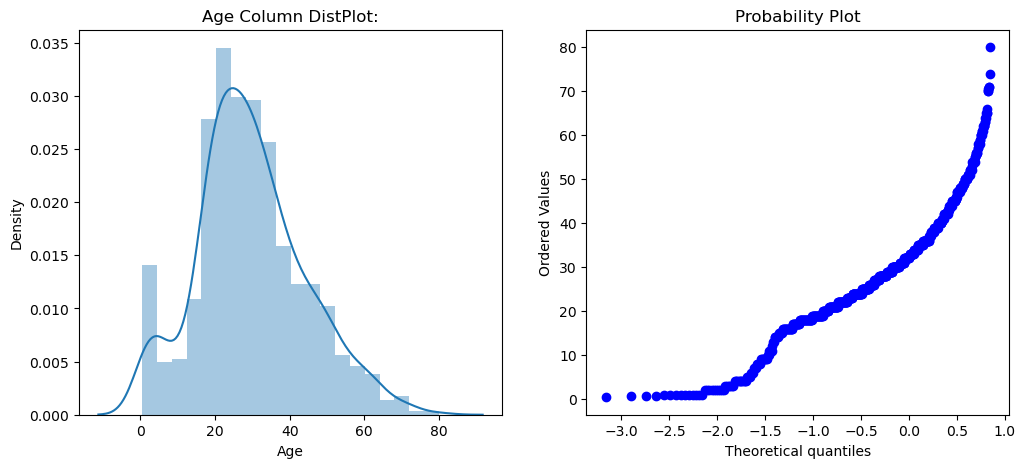

In [91]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age Column DistPlot Before Imputation:')

sns.distplot(df['Age'],ax=ax1)

ax2.set_title('Age Column Q-Q Plot Before Imputation:')

stats.probplot(df['Age'],dist='norm' ,plot=plt)
plt.sca(ax2)


plt.show()

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\1340945641.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n['Age'],ax=ax1)


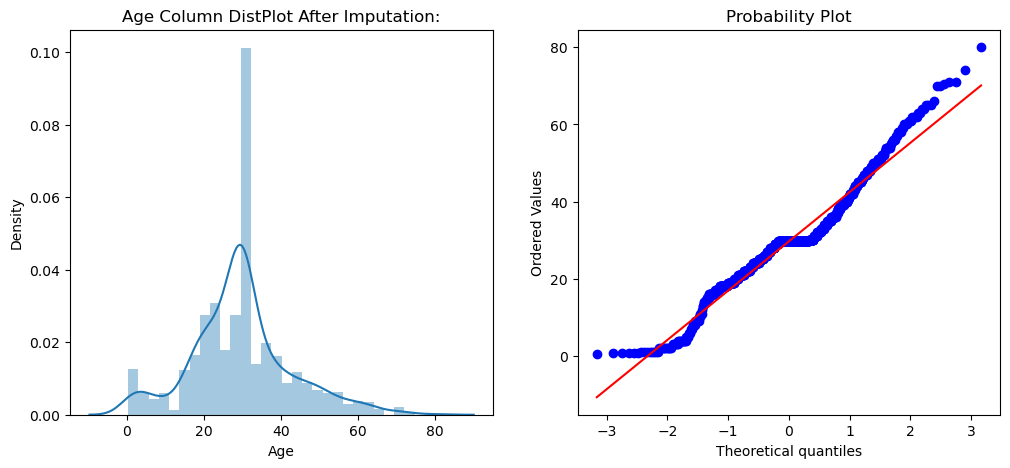

In [95]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age Column DistPlot After Imputation:')

sns.distplot(df_n['Age'],ax=ax1)

ax2.set_title('Age Column Q-Q Plot After Imputation:')

stats.probplot(df_n['Age'],dist='norm' ,plot=plt)
plt.sca(ax2)


plt.show()

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\776917597.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n['Fare'],ax=ax1)


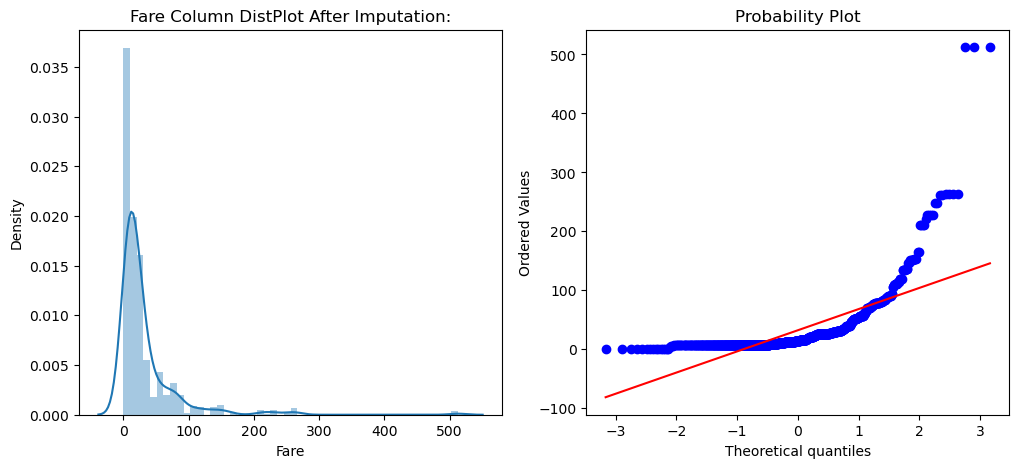

In [112]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Fare Column DistPlot After Imputation:')

sns.distplot(df_n['Fare'],ax=ax1)

ax2.set_title('Fare Column Q-Q Plot After Imputation:')

stats.probplot(df_n['Fare'],dist='norm' ,plot=plt)
plt.sca(ax2)


plt.show()

In [114]:
a = int(input('Enter a value :'))
print(f'Log value of {a} is {np.log(a)}')
print(f'Log 1P value of {a} is {np.log1p(a)}')



Enter a value : 0


Log value of 0 is -inf
Log 1P value of 0 is 0.0


C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\3338792719.py:2: RuntimeWarning: divide by zero encountered in log
  print(f'Log value of {a} is {np.log(a)}')


In [121]:
from sklearn.preprocessing import FunctionTransformer
ftc = FunctionTransformer(func=np.log1p)
df_ftc = ftc.fit_transform(df_n[['Fare']])

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9572\2454472409.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ftc['Fare'],ax=ax1)


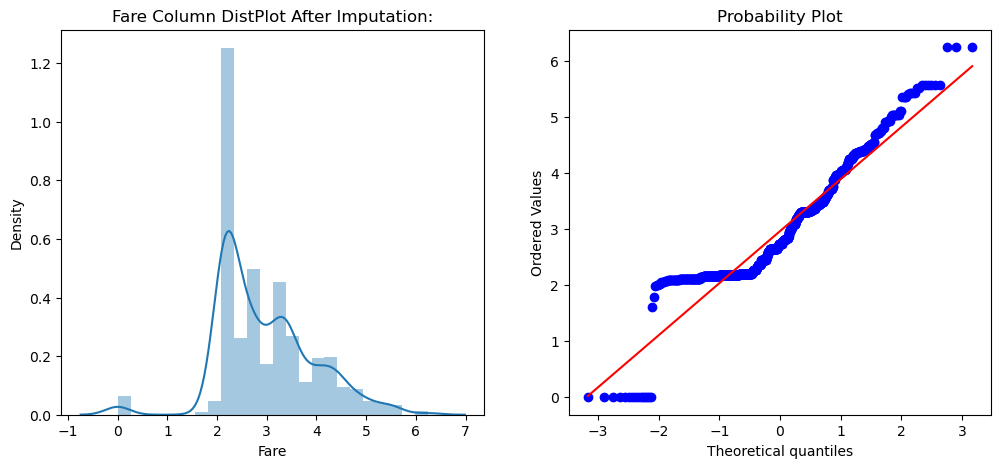

In [123]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Fare Column DistPlot After Imputation:')

sns.distplot(df_ftc['Fare'],ax=ax1)

ax2.set_title('Fare Column Q-Q Plot After Imputation:')

stats.probplot(df_ftc['Fare'],dist='norm' ,plot=plt)
plt.sca(ax2)


plt.show()